In [125]:
import pandas as pd
import os
import glob
import numpy as np
import pylab as plt
#from collections import deque
%matplotlib inline

In [126]:
path_home =  "C:/Users/fallet/Documents/220818_Remy pour Mathieu_polarisation/Correction outlier"
#os.chdir(path_home)

exp1 = "KO + EBSS"
exp2 = "KO + iRUFY3 + EBSS"
exp3 = "KO + iRUFY3 + NT"
exp4 = "KO + NT"
exp5 = "Test"

path_exp1 = "/KO + EBSS/"
path_exp2 = "/KO + iRUFY3 + EBSS/"
path_exp3 = "/KO + iRUFY3 + NT/"
path_exp4 = "/KO + NT/"
path_exp5 = "/Test/"

path1 = path_home + path_exp1
path2 = path_home + path_exp2
path3 = path_home + path_exp3
path4 = path_home + path_exp4
path5 = path_home + path_exp5


# take all csv files except with last pattern "N" if Normalized files was not deleted
csv_files1 = glob.glob(os.path.join(path1, "*[!N].csv"))
csv_files2 = glob.glob(os.path.join(path2, "*[!N].csv"))
csv_files3 = glob.glob(os.path.join(path3, "*[!N].csv"))
csv_files4 = glob.glob(os.path.join(path4, "*[!N].csv"))
csv_files5 = glob.glob(os.path.join(path5, "*[!N].csv"))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


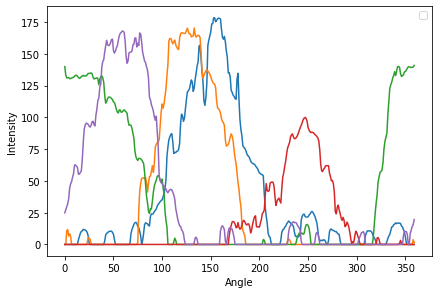

In [127]:
df1 = pd.read_csv("C:/Users/fallet/Documents/220818_Remy pour Mathieu_polarisation/Correction outlier/Test/test1.csv")
df2 = pd.read_csv("C:/Users/fallet/Documents/220818_Remy pour Mathieu_polarisation/Correction outlier/Test/test2.csv")
df3 = pd.read_csv("C:/Users/fallet/Documents/220818_Remy pour Mathieu_polarisation/Correction outlier/Test/test3.csv")
df4 = pd.read_csv("C:/Users/fallet/Documents/220818_Remy pour Mathieu_polarisation/Correction outlier/Test/test4.csv")
df5 = pd.read_csv("C:/Users/fallet/Documents/220818_Remy pour Mathieu_polarisation/Correction outlier/Test/test5.csv")

plt.plot(df1["Y"])
plt.plot(df2["Y"])
plt.plot(df3["Y"])
plt.plot(df4["Y"])
plt.plot(df5["Y"])

plt.tight_layout()
plt.xlabel("Angle")
plt.ylabel("Intensity")
plt.legend()

In [128]:
def NormalizeFiles(csv_files):
    for f in csv_files:
        df = pd.read_csv(f)
        df.rename(columns={"X": "Angle", "Y": "Int"}, inplace=True)

        max_Int = df['Int'].max()
        df['Int'] = df['Int']*100/max_Int
        max_Angle = df['Angle'][df['Int'].argmax()] 
        
        df['Angle'] = df['Angle']-max_Angle

        # modulo to convert to [-180 180] degrés
        df.loc[df['Angle']<(-180), "Angle"] = df['Angle']%180
        df.loc[df['Angle']>(180), "Angle"] = df['Angle']%(-180)
        
        #Sort Int values by angle index from -180 to 180
        df = df.sort_values(by ='Angle' )

        # save df in directory
        temp = os.path.splitext(f)
        f = temp[0]
        name = f+"_N.csv"
        if os.path.exists(name):
            os.remove(name)
        df.to_csv(name) 
        
NormalizeFiles(csv_files1)
NormalizeFiles(csv_files2)
NormalizeFiles(csv_files3)
NormalizeFiles(csv_files4)
NormalizeFiles(csv_files5)

In [129]:
csv_files1_N = glob.glob(os.path.join(path1, "*_N.csv"))
csv_files2_N = glob.glob(os.path.join(path2, "*_N.csv"))
csv_files3_N = glob.glob(os.path.join(path3, "*_N.csv"))
csv_files4_N = glob.glob(os.path.join(path4, "*_N.csv"))
csv_files5_N = glob.glob(os.path.join(path5, "*_N.csv"))

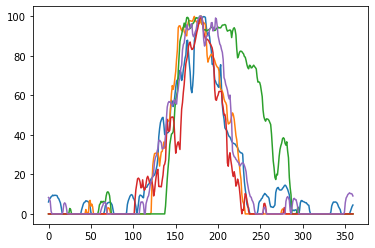

In [130]:
df1_N = pd.read_csv("C:/Users/fallet/Documents/220818_Remy pour Mathieu_polarisation/Correction outlier/Test/test1_N.csv")
df2_N = pd.read_csv("C:/Users/fallet/Documents/220818_Remy pour Mathieu_polarisation/Correction outlier/Test/test2_N.csv")
df3_N = pd.read_csv("C:/Users/fallet/Documents/220818_Remy pour Mathieu_polarisation/Correction outlier/Test/test3_N.csv")
df4_N = pd.read_csv("C:/Users/fallet/Documents/220818_Remy pour Mathieu_polarisation/Correction outlier/Test/test4_N.csv")
df5_N = pd.read_csv("C:/Users/fallet/Documents/220818_Remy pour Mathieu_polarisation/Correction outlier/Test/test5_N.csv")

plt.plot(df1_N["Int"])
plt.plot(df2_N["Int"])
plt.plot(df3_N["Int"])
plt.plot(df4_N["Int"])
plt.plot(df5_N["Int"])

In [131]:
def MeanProfile(csv_files_N,path_out,exp):
    
    angle = np.arange(-180, 180, 1)
    df_mean = pd.DataFrame({"Angle":angle})
    df_all = pd.DataFrame()

    for f in csv_files_N:
        df = pd.read_csv(f)
        df = df['Int']
        
        # concatenate df in X 
        df_all = pd.concat([df_all,df], axis=1)
        
    # make the mean of all row
    mean = df_all.mean(axis = 1)
    # create a column "Int" and put the values mean
    df_mean["Int"] = mean
        
    # Normalize in Intensity
    max_Int = df_mean['Int'].max()
    df_mean['Int'] = df_mean['Int']*100/max_Int    
        
    # save mean profile
    name = path_out+exp+"_mean_N.csv"
    if os.path.exists(name):
        os.remove(name)
    df_mean.to_csv(name)

In [132]:
MeanProfile(csv_files1_N, path1, exp1)
MeanProfile(csv_files2_N, path2, exp2)
MeanProfile(csv_files3_N, path3, exp3)
MeanProfile(csv_files4_N, path4, exp4)
MeanProfile(csv_files5_N, path5, exp5)

In [133]:
df_mean_1 = pd.read_csv(path1 + exp1 +"_mean_N.csv")
df_mean_2 = pd.read_csv(path2 + exp2 +"_mean_N.csv")
df_mean_3 = pd.read_csv(path3 + exp3 +"_mean_N.csv")
df_mean_4 = pd.read_csv(path4 + exp4 +"_mean_N.csv")
df_mean_5 = pd.read_csv(path5 + exp5 +"_mean_N.csv")

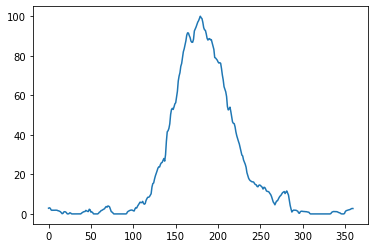

In [134]:
df_mean = pd.read_csv("C:/Users/fallet/Documents/220818_Remy pour Mathieu_polarisation/Correction outlier/Test/Test_mean_N.csv")
plt.plot(df_mean["Int"])

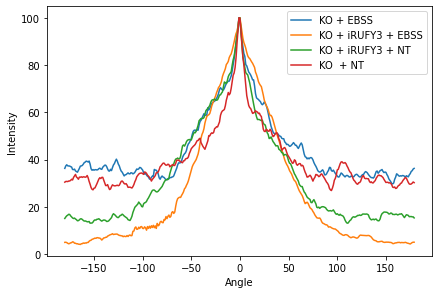

In [135]:
# overlay curves
Y1 = df_mean_1['Int']
Y2 = df_mean_2['Int']
Y3 = df_mean_3['Int']
Y4 = df_mean_4['Int']
#Y5 = df_mean_5['Int']

#X = df_mean_1['Angle']
X = angle = np.arange(-180, 180, 1)

plt.plot(X, Y1, label = "KO + EBSS")
plt.plot(X, Y2, label = "KO + iRUFY3 + EBSS")
plt.plot(X, Y3, label = "KO + iRUFY3 + NT")
plt.plot(X, Y4, label = "KO  + NT")
#plt.plot(X, Y5, label = "Test")

plt.tight_layout()
plt.xlabel("Angle")
plt.ylabel("Intensity")
plt.legend()

In [136]:
# bin profile
# bin=30
# 360/30 =12 valeurs

def BinProfile(df_mean, path_out,exp):
    bin1 = np.zeros((12,30))
    b = pd.DataFrame()

    # Bin mean (bin=30)
    b = df_mean['Int'].tolist()              
    for i in range (0,360,30):
        k=int(i/30)
        mean=(b[i] + b[i+1] + b[i+2] + b[i+3] + b[i+4] + b[i+5] + b[i+6] + b[i+7] + b[i+8] + b[i+9] + b[i+10] + b[i+11] + b[i+12] + b[i+13] + b[i+14] + b[i+15] + b[i+16] + b[i+17] + b[i+18] + b[i+19] + b[i+20] + b[i+21] + b[i+22] + b[i+23] + b[i+24] + b[i+25] + b[i+26] + b[i+27] + b[i+28] + b[i+29])/30
        for j in range(30):
            bin1[k,j]=mean
    bin1 = pd.DataFrame(bin1)
    #bin1.rename(columns={"0": "Int"}, inplace=True)
    #print("Bin Mean: \n",bin1)
    #plt.plot(bin1)
    #bin1.shape()
    max_Int = bin1.max()
    bin1 = bin1*100/max_Int  
    
    # save bin profile
    name = path_out+exp+"_mean_bin_N.csv"
    if os.path.exists(name):
        os.remove(name)
    bin1.to_csv(name)
 

In [137]:
BinProfile(df_mean_1,path1,exp1)
BinProfile(df_mean_2,path2,exp2)
BinProfile(df_mean_3,path3,exp3)
BinProfile(df_mean_4,path4,exp4)

df_mean_1_bin = pd.read_csv(path1 + exp1 +"_mean_bin_N.csv")
df_mean_2_bin = pd.read_csv(path2 + exp2 +"_mean_bin_N.csv")
df_mean_3_bin = pd.read_csv(path3 + exp3 +"_mean_bin_N.csv")
df_mean_4_bin = pd.read_csv(path4 + exp4 +"_mean_bin_N.csv")
#df_mean_5_bin = pd.read_csv(path5 + exp5 +"_mean_bin_N.csv")

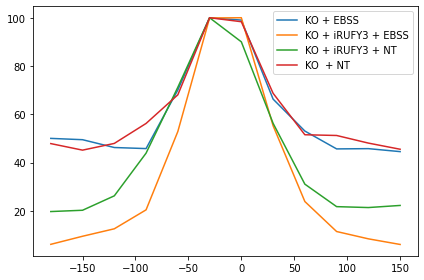

In [138]:
# overlay bin curves
Y1 = df_mean_1_bin['0']
Y2 = df_mean_2_bin['0']
Y3 = df_mean_3_bin['0']
Y4 = df_mean_4_bin['0']
#Y5 = df_mean_5['Int']

#X = df_mean_1['Angle']
X = angle = np.arange(-180, 180, 30)

fig = plt.figure()
plt.plot(X, Y1, label = "KO + EBSS")
plt.plot(X, Y2, label = "KO + iRUFY3 + EBSS")
plt.plot(X, Y3, label = "KO + iRUFY3 + NT")
plt.plot(X, Y4, label = "KO  + NT")
#plt.plot(X, Y5, label = "Test")

plt.tight_layout()
#plt.xlabel("Angle")
#plt.ylabel("Intensity")
plt.legend()
plt.savefig('Superposition.png',dpi=600)
plt.show()

In [139]:
# Fit Y0
import matplotlib.pyplot as plt
from scipy import asarray as ar, exp, sqrt
from scipy.optimize import curve_fit

angles = ar(X)
data = ar(Y4)

n = len(data)  
mean = sum(data*angles)/n
sigma = sqrt(sum(data*(angles-mean)**2)/n)
Y0 = 40

def gaus(x,a,mu,sigma,Y0):
    return Y0 + a*exp(-(x-mu)**2/(2*sigma**2))

popt,pcov = curve_fit(gaus,angles,data)#,p0=[0.18,mean,sigma])  ## <--- leave out the first estimation of the parameters
xx = np.linspace( -180, 180, 10 )  ## <--- calculate against a continuous variable
print("Y0="+str(popt[3]))

Y0=47.94105248610531


C:\Users\fallet\AppData\Local\Temp\ipykernel_16388\4257800306.py:6: DeprecationWarning: scipy.asarray is deprecated and will be removed in SciPy 2.0.0, use numpy.asarray instead
  angles = ar(X)
C:\Users\fallet\AppData\Local\Temp\ipykernel_16388\4257800306.py:7: DeprecationWarning: scipy.asarray is deprecated and will be removed in SciPy 2.0.0, use numpy.asarray instead
  data = ar(Y4)
C:\Users\fallet\AppData\Local\Temp\ipykernel_16388\4257800306.py:11: DeprecationWarning: scipy.sqrt is deprecated and will be removed in SciPy 2.0.0, use numpy.lib.scimath.sqrt instead
  sigma = sqrt(sum(data*(angles-mean)**2)/n)
C:\Users\fallet\AppData\Local\Temp\ipykernel_16388\4257800306.py:15: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return Y0 + a*exp(-(x-mu)**2/(2*sigma**2))


C:\Users\fallet\AppData\Local\Temp\ipykernel_16388\4257800306.py:15: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
  return Y0 + a*exp(-(x-mu)**2/(2*sigma**2))


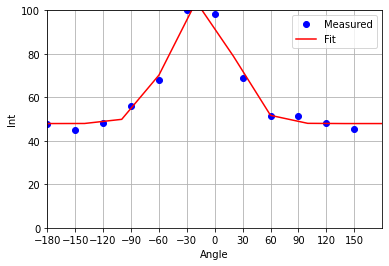

In [140]:
fig = plt.figure()
plt.plot(angles, data, "ob", label = "Measured")
plt.plot(xx,gaus(xx,*popt),'r',label='Fit')  ## <--- plot against the contious variable
plt.xlim(-180, 180)
plt.ylim(0, 100)
plt.xticks(angles)
plt.title("")
plt.xlabel("Angle")
plt.ylabel("Int")
plt.grid()
plt.legend()
#plt.savefig('normal.png')
plt.show()